___

___
# K Means Clustering of University Data

Hello everybody! For this project, I want to introduce K-means clustering, one of the most common clustering algorithms in machine learning. 

For those of you who may be new to machine learning, clustering is an example of an unsupervised learning model, when we feed uncategorized training data into a model and have our model attempt to categorize that data in some way according to its features. The alternative is a supervised learning model, where we assign labels to our training data in advance indicating which category each data point belongs to, and the model attempts to predict which category a new data point belongs to.

I worked in education in China for almost 4 years, where I used data analytics to estimate students' likelihood of admission to universities on their school list, so just for fun, I'll create a model in Python using K-means clustering to cluster universities into two groups: private and public. In reality, a student who does at least cursory research on a university website can find out in under a minute whether a school is private or public, but we'll see if a model can correctly categorize schools based on features that may seem very relevant (out-of-state tuition, graduation rate) and others that might not seem relevant at all (percentage of alumni who donate). Along the way, we'll do some exploratory data analysis to understand more about the data.

___
**NOTE: we actually have the labels for this data set, but we will NOT use them for the K-means clustering algorithm, since that is an unsupervised learning algorithm. At the end, I'll compare K-means to a supervised learning algorithm to compare the performance of the two models.** 

___

## The Data

Here are the features in this dataset - feel free to glance at them and think about how well or poorly they might predict a school being public or private:
* Apps: Number of applications received
* Accept: Number of applications accepted
* Enroll: Number of new students enrolled
* Top10perc: % of new students from top 10% of their high school class
* Top25perc: % of new students from top 25% of their high school class
* F.Undergrad: Number of full-time undergraduates
* P.Undergrad: Number of part-time undergraduates
* Outstate: Out-of-state tuition
* Room.Board: Room and board costs
* Books: Estimated book costs
* Personal: Estimated personal spending
* PhD: % of faculty with PhDs
* Terminal: % of faculty with a terminal degree (PhD/JD/MD/MBA/etc)
* S.F.Ratio: Student/faculty ratio
* perc.alumni: % alumni who donate
* Expend: Instructional expenditure per student
* Grad.Rate: Graduation rate

## EDA = Exploratory Data Analysis

A good way to start your analysis is to use DataFrame.describe() to get some basic statistics about your data. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

colleges = pd.read_csv('College_Data',index_col=0)
colleges.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


Purely by looking at the max value of some of these columns, a few things stand out:

1) It's common knowledge that top private schools can charge up to $60k/year, but the max out-of-state tuition here is only $21,700, so we can assume this tuition is listed on a per semester basis rather than per year.

2) There's a school that has above 100% of faculty with PhDs! This seems fishy, but it can probably be explained by a handful of over-achieving faculty who may have a DUAL PhD that have been double counted.

3) In the same vein, we've also got a school with a graduation rate of 118%! We'll explore this anomaly later...

Feel free to poke around the mean, median, and other statistics to see what sticks out to you.

Let's figure out which college had the highest number of applicants.

In [16]:
colleges.loc[colleges['Apps']==np.max(colleges['Apps'])]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Rutgers at New Brunswick,No,48094,26330,4520,36,79,21401,3712,7410,4748,690,2009,90,95,19.5,19,10474,77


Turns out Rutgers has the highest number of applicants and acceptances, but not the highest number of enrollments. Let's figure which college had the highest enrollment.

In [19]:
colleges.loc[colleges['Enroll']==np.max(colleges['Enroll'])]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Texas A&M Univ. at College Station,No,14474,10519,6392,49,85,31643,2798,5130,3412,600,2144,89,91,23.1,29,8471,69


Of the 777 universities in this dataset, Texas A&M takes the cake for highest enrollment. What about the school with the highest percentage of students in the top 10% of their high school class?

In [21]:
colleges.loc[colleges['Top10perc']==np.max(colleges['Top10perc'])]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Massachusetts Institute of Technology,Yes,6411,2140,1078,96,99,4481,28,20100,5975,725,1600,99,99,10.1,35,33541,94


Another major bragging point for high schools and universities alike is their student-faculty ratio: the lower the better. The winner here is University of Charleston, with a **VERY** low ratio of 2.5, which is practically as intimate a teaching environment as homeschooling or private tutoring. Considering that the 25th percentile of the student-faculty ratio is 11.5, U of C is a major outlier.

In [23]:
colleges.loc[colleges['S.F.Ratio']==np.min(colleges['S.F.Ratio'])]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
University of Charleston,Yes,682,535,204,22,43,771,611,9500,3540,400,750,26,58,2.5,10,7683,57


Now let's talk money: which university has the highest alumni donation rate?

In [25]:
colleges.loc[colleges['perc.alumni']==np.max(colleges['perc.alumni'])]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Williams College,Yes,4186,1245,526,81,96,1988,29,19629,5790,500,1200,94,99,9.0,64,22014,99


Hardly surprising that Williams takes it away as it's a small liberal arts college (~2000 students total) that caters to largely wealthy families with a strong network. Let's check out the statistics for the percentage of alumni donations.

In [30]:
colleges.describe()['perc.alumni']

count    777.000000
mean      22.743887
std       12.391801
min        0.000000
25%       13.000000
50%       21.000000
75%       31.000000
max       64.000000
Name: perc.alumni, dtype: float64

Hence the abundance of on-campus job opportunities as student callers - the median percentage is a measly 21%.

Now here's the juicy stuff: let's see who's really getting their dollar's worth from their university education by looking at the ratio of student expenditure to out-of-state tuition. 

In [8]:
colleges['expense ratio'] = colleges['Expend']/(colleges['Outstate'])
colleges.describe()['expense ratio']

count    777.000000
mean       0.958618
std        0.359789
min        0.378261
25%        0.741767
50%        0.862842
75%        1.072951
max        3.682883
Name: expense ratio, dtype: float64

In [9]:
np.percentile(colleges['expense ratio'],69)

0.9973099620488659

This tells me that ~69% of universities are investing more money in their students than they're charging. In other words, ~69% of these universities are LOSING MONEY on their students if we look at tuition alone.

In [37]:
colleges.loc[colleges['expense ratio']==np.max(colleges['expense ratio'])]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,expense ratio
University of Alabama at Birmingham,No,1797,1260,938,24,35,6960,4698,4440,5175,750,2200,96,96,6.7,16,16352,33,3.682883


So the best "bang for your buck" award goes to...\**drum roll\**...University of Alabama at Birmingham! However, a more cynical way of looking at it is if UAB's spending 4x the out-of-state tuition on every student, then it might not be in business much longer...so if you're in the HS class of 2021, get in while they're still afloat, but hold tight to your wallet because the student callers will be working overtime to snag your donation dollars! 

Out of curiosity, let's also figure out who the biggest thief in higher education is: cue the college with the lowest expense ratio!

In [82]:
colleges.loc[colleges['expense ratio']==np.min(colleges['expense ratio'])]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,expense ratio
Lindenwood College,Yes,810,484,356,6,33,2155,191,9200,4800,1000,4200,65,85,24.1,9,3480,100,0.378261


## Visualizations

It's time to create some data visualizations!

The first hypotheses I'll make is that private universities tend to have higher tuition and higher room and board on account of having generally nicer facilities.

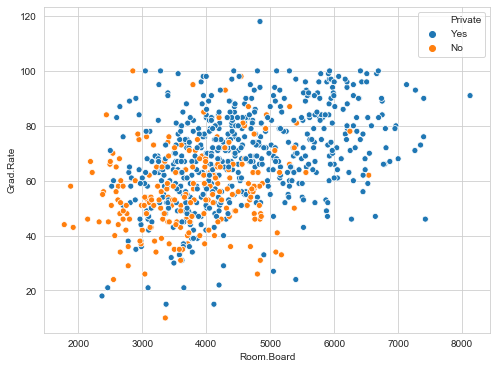

In [179]:
plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
sns.scatterplot(colleges['Room.Board'],colleges['Grad.Rate'],hue=colleges['Private'])

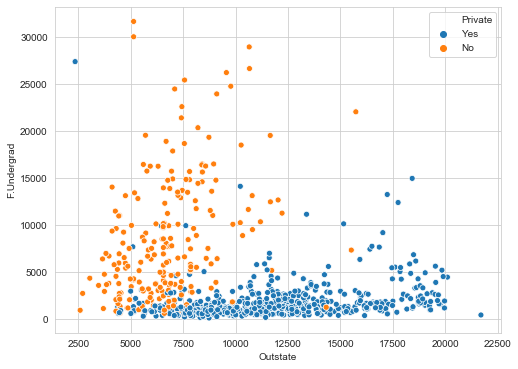

In [156]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=colleges,x='Outstate',y='F.Undergrad',hue='Private')

VERY interesting how the school's undergrad population is almost completely uncorrelated with tuition, which begs the question: where is that money going?

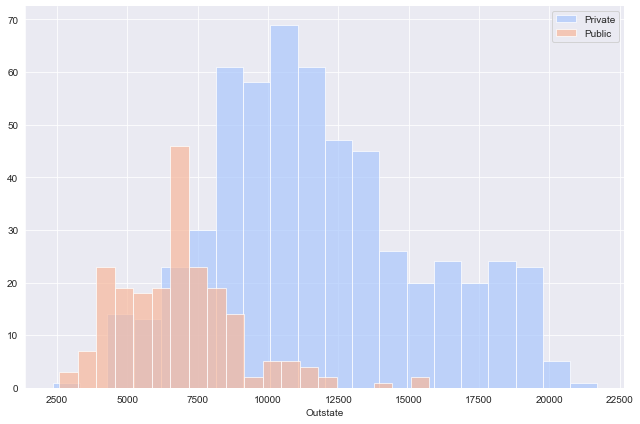

In [180]:
sns.set_style('darkgrid')
g = sns.FacetGrid(colleges,hue='Private',palette='coolwarm',height=6,aspect=1.5)
g = g.map(plt.hist,'Outstate',bins=20,alpha=0.7)
plt.legend(labels=['Private','Public'])

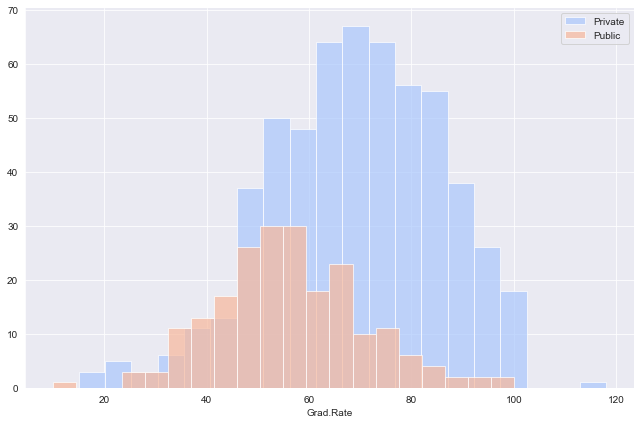

In [104]:
grid = sns.FacetGrid(colleges,hue='Private',palette='coolwarm',height=6,aspect=1.5)
grid = grid.map(plt.hist,'Grad.Rate',bins=20,alpha=0.7)
plt.legend(labels=['Private','Public'])

As expected, out-of-state tuition is higher for private schools, and so is graduation rate - perhaps because if a student is investing that much money into their education, their parents are thinking, "You better finish...or else!"

Now back to that school with a graduation rate of higher than 100%.

In [105]:
colleges.loc[colleges['Grad.Rate'] > 100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,expense ratio
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118,0.820226


Maybe this school pulled a fast one and counted double majors as having graduated twice? In reality, this makes no sense, so I'm going to change this graduation rate to 100%.

In [181]:
colleges['Grad.Rate']['Cazenovia College']=100

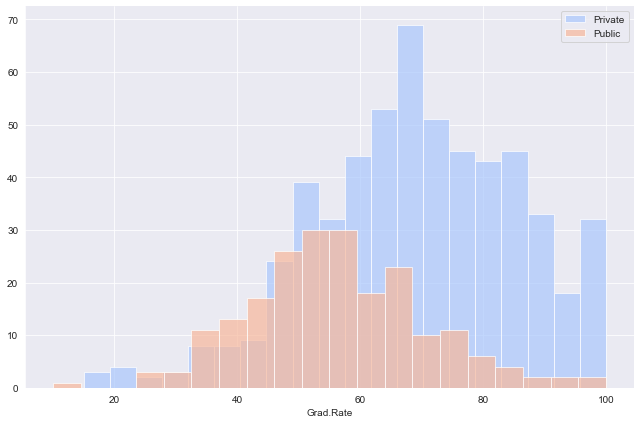

In [183]:
grid = sns.FacetGrid(colleges,hue='Private',palette='coolwarm',height=6,aspect=1.5)
grid = grid.map(plt.hist,'Grad.Rate',bins=20,alpha=0.7)
plt.legend(labels=['Private','Public'])

Much better! Now on to the moment you've all been waiting for: K-means clustering!

## K-Means Cluster Creation

First we'll import KMeans from Scikit-learn, the most popular package for machine learning in Python. The way K-means works is the following:

1) **Pick the number of clusters.** Whether you choose 2 or 4 or 10 is dictated by the domain of the specific problem. In this case, we're sorting into public and private schools, so we will choose the number of clusters to be 2. If you were analyzing genetic variations in a population and knew beforehand there were 7 known variants, then you would want to choose 7.
2) **Randomly assign each data point to a category.**
3) **Take the centroid of the data points in each category.** For those of you who think a centroid is some cool-sounding type of asteroid, it's calculus-speak for "the average of all the data in each cluster." You already understand this intuitively for 1-D data: the average price of grocery items gets you a single number like $52. If you calculate the average price AND average quantity of grocery items (2 dimensions), you'll get two numbers like $52 and 2 items. In this dataset, we have 18 features, so each centroid corresponds to a 18-D set of coordinates. And no, we're not going to visualize this.
4) **Re-assign each data point to the category corresponding to the nearest centroid.** 
5) **Repeat Steps 3 and 4 until there are no more changes in category.**

Here's a great image to help illustrate: [insert one for notes]

In [160]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2)
km.fit(colleges.drop('Private',axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

One end result of K means clustering works is a mathematical representation (set of coordinates) of the centroid of each final cluster. Calling km.cluster_centers_ gives an array of 2 arrays, each one corresponding to the centroid of one cluster. 

In [161]:
km.cluster_centers_

array([[1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.50926756e+01, 9.02321069e-01],
       [1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01, 1.30734947e+00]])

## Evaluation

There is no perfect way to evaluate clustering if you don't have the labels. However, in this case, the colleges data set told us whether each school was public or private, so we can cross-validate our K-means model with these labels to compare the performance of supervised and unsupervised models in general.

First, we need to convert our "Private: Yes or No?" column into 0s and 1s that the K-means model can understand.

In [184]:
def convertToCluster(cluster):
    if cluster=='Yes':
        return 1
    else:
        return 0
colleges['Cluster'] = colleges['Private'].apply(convertToCluster)

Two quick ways to evaluate the performance of a machine learning model is to look at a confusion matrix and a classification report. I won't go into all the details of these here, so check out the Wikipedia pages to learn more.

In [169]:
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(colleges['Cluster'],km.labels_))
print(classification_report(colleges['Cluster'],km.labels_))

[[138  74]
 [531  34]]
              precision    recall  f1-score   support

           0       0.21      0.65      0.31       212
           1       0.31      0.06      0.10       565

    accuracy                           0.22       777
   macro avg       0.26      0.36      0.21       777
weighted avg       0.29      0.22      0.16       777



If you're used to supervised learning algorithms, you may look at these results and think, "22% accuracy? This model is garbage! What are unsupervised models good for anyway?" But remember the definition of "unsupervised": the model is aiming to make sense out of the mess of 18 features that we've given it, with no labels. This is not an easy task, so let's give credit to K-Means where credit is due.

## Bonus: Comparing unsupervised and supervised learning algorithms

Let's actually compare the results we just got to that of a supervised learning model to evaluate their performance (or at the very least, set our expectations to the proper low level for unsupervised learning 😉). Let's just go for a classic logistic regression.

In [196]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

unis = colleges
X = unis.drop('Cluster',axis=1)
y = unis['Cluster']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [197]:
preds = logmodel.predict(X_test)

In [199]:
print("Using K means clustering (unsupervised):\n")
print(confusion_matrix(colleges['Cluster'],km.labels_))
print(classification_report(colleges['Cluster'],km.labels_))

print("Using logistic regression (supervised):\n")
print(confusion_matrix(y_test,preds))
print(classification_report(y_test,preds))

Using K means clustering (unsupervised):

[[138  74]
 [531  34]]
              precision    recall  f1-score   support

           0       0.21      0.65      0.31       212
           1       0.31      0.06      0.10       565

    accuracy                           0.22       777
   macro avg       0.26      0.36      0.21       777
weighted avg       0.29      0.22      0.16       777

Using logistic regression (supervised):

[[ 52  14]
 [  7 161]]
              precision    recall  f1-score   support

           0       0.88      0.79      0.83        66
           1       0.92      0.96      0.94       168

    accuracy                           0.91       234
   macro avg       0.90      0.87      0.89       234
weighted avg       0.91      0.91      0.91       234



Behold the power of labeling, folks. Using a simple logistic regression, a supervised learning model, the accuracy shot up from 22% to 91%.

--
Hopefully you can begin to see how K Means is useful for clustering un-labeled data!